# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [14]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [6]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



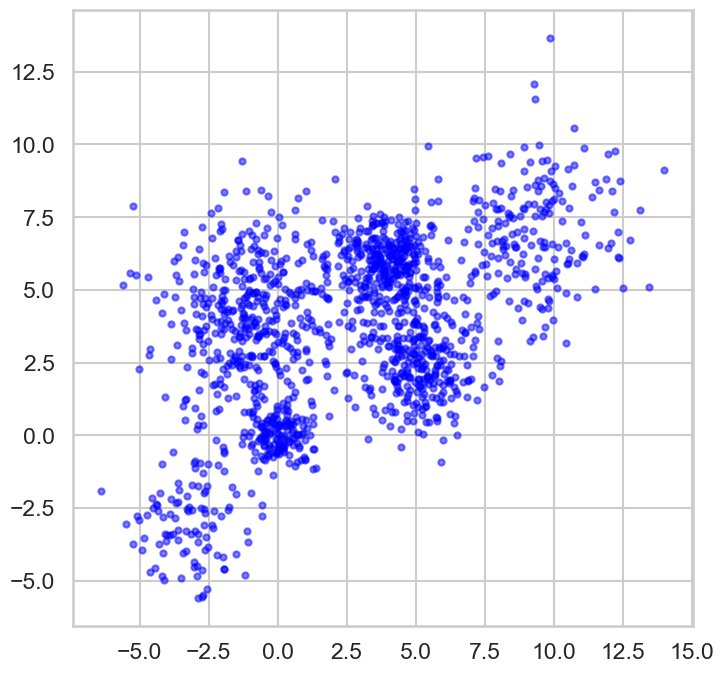

In [67]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

In [27]:
Multi_blob_Data_Scaled = StandardScaler().fit_transform(Multi_blob_Data)
Multi_blob_Data_Scaled

array([[-1.26719967, -2.24928146],
       [-1.2175423 , -1.5406789 ],
       [-1.50759118, -2.29017465],
       ...,
       [ 1.82415545,  3.28071405],
       [ 0.70912955,  2.05274183],
       [ 1.48190485,  1.25100904]])

#### Different values of K

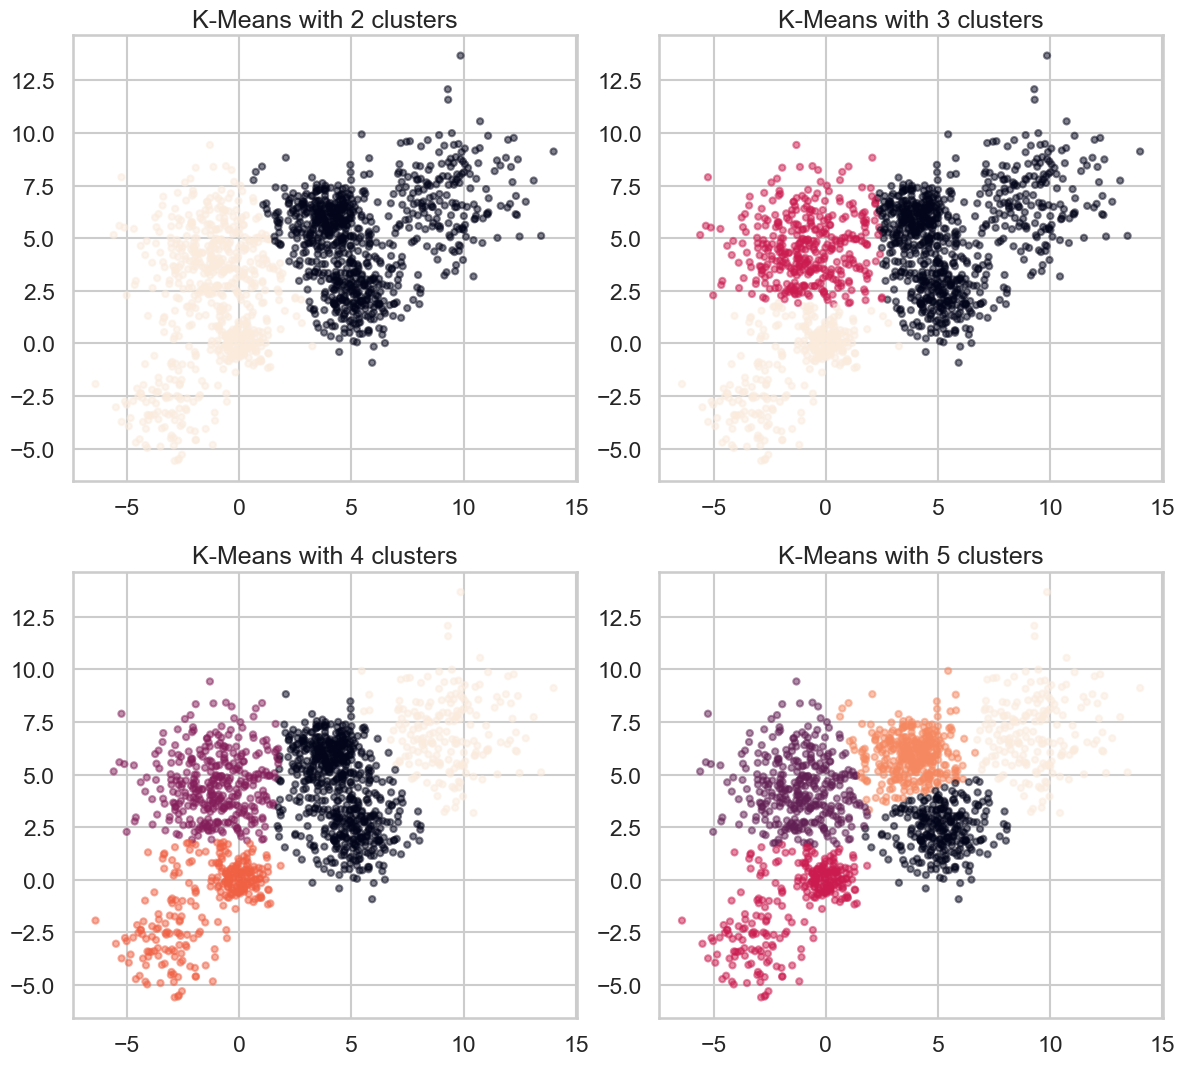

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(12, 11))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten to iterate easily

for i, k in enumerate(range(2, 6)):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(Multi_blob_Data)

    axes[i].scatter(Multi_blob_Data[:, 0],  
                    Multi_blob_Data[:, 1],    
                    c=cluster_labels, alpha=0.5, s=20)
    axes[i].set_title(f'K-Means with {k} clusters')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### Distortion and Siluette Score 

In [110]:
ssd = []
sil_score = []
for k in range(2,15,1):
    model = KMeans(n_clusters=k)
    model.fit(Multi_blob_Data)
    cluster_labels = model.fit_predict(Multi_blob_Data)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    sil_score.append(silhouette_score(Multi_blob_Data, cluster_labels))
    

Text(0, 0.5, 'silhouette_score')

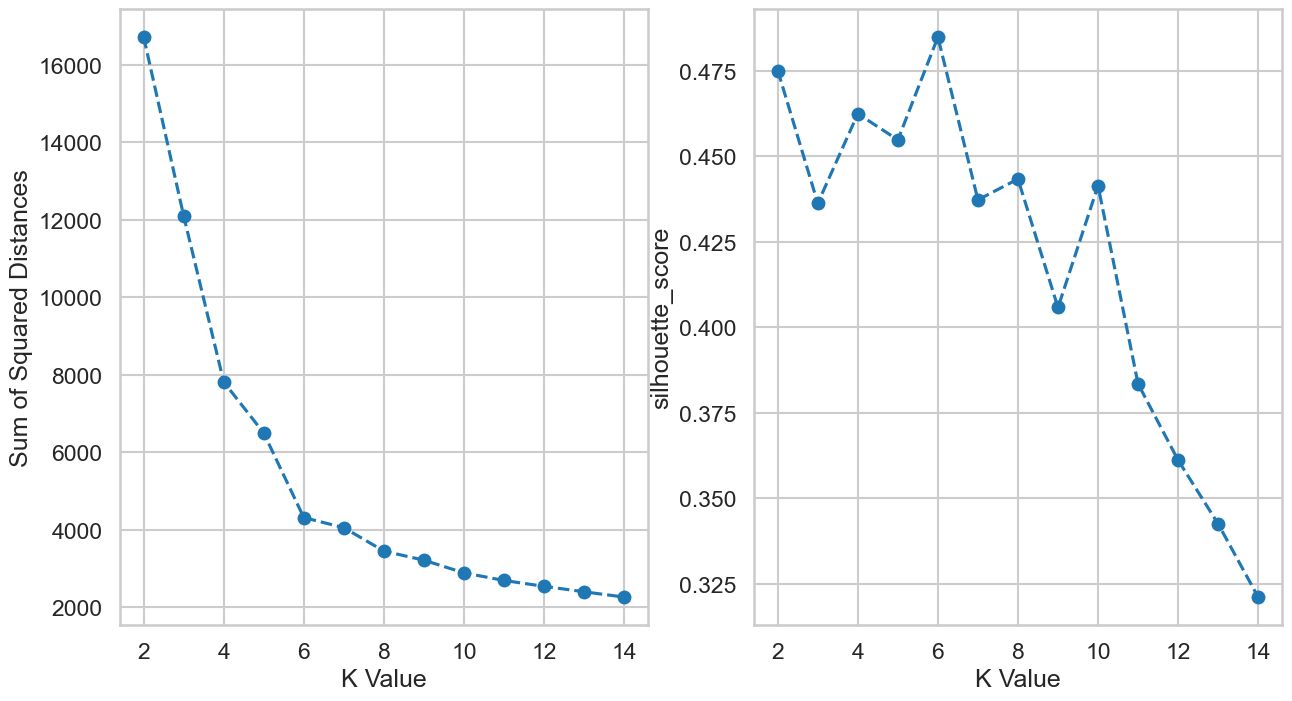

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 8))
ax1.plot(range(2,15,1), ssd, 'o--')
ax1.set_xlabel("K Value")
ax1.set_ylabel("Sum of Squared Distances")

ax2.plot(range(2,15,1), sil_score, 'o--')
ax2.set_xlabel("K Value")
ax2.set_ylabel("silhouette_score")


Scaling the data

In [112]:
ssd = []
sil_score = []
for k in range(2,15,1):
    model = KMeans(n_clusters=k)
    model.fit(Multi_blob_Data_Scaled)
    cluster_labels = model.fit_predict(Multi_blob_Data_Scaled)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    sil_score.append(silhouette_score(Multi_blob_Data_Scaled, cluster_labels))
    

Text(0, 0.5, 'silhouette_score')

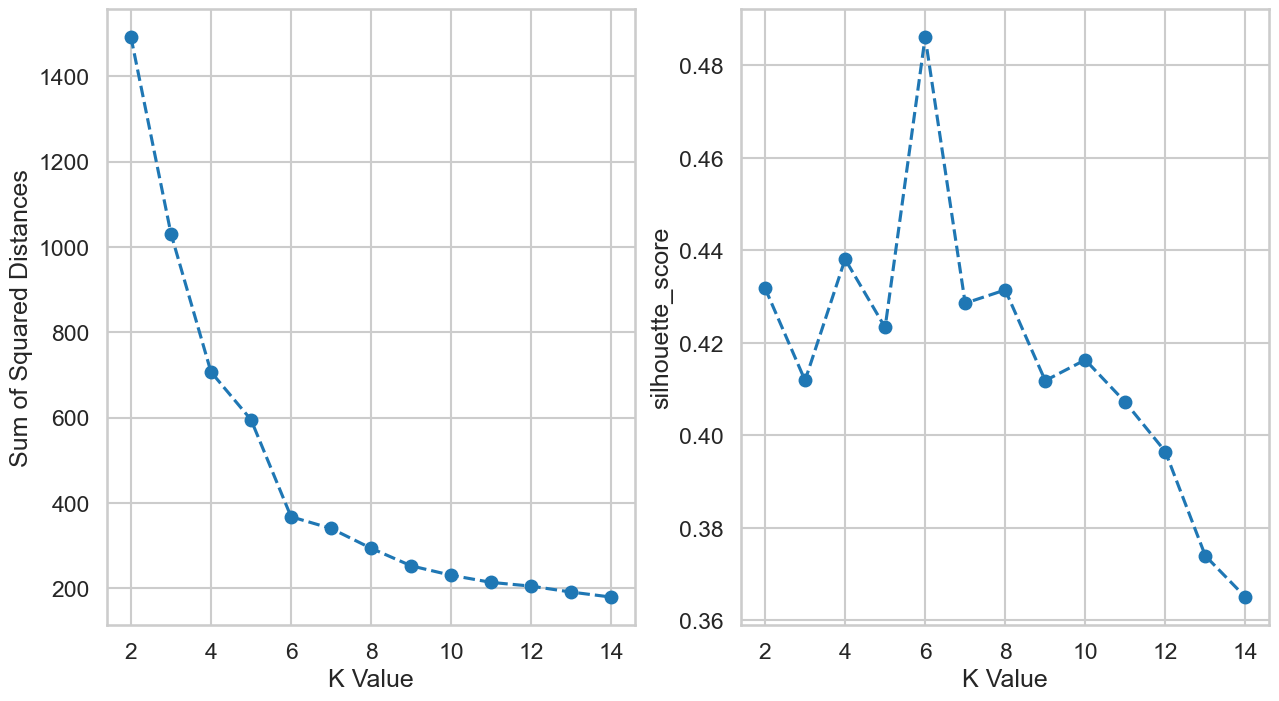

In [113]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 8))
ax1.plot(range(2,15,1), ssd, 'o--')
ax1.set_xlabel("K Value")
ax1.set_ylabel("Sum of Squared Distances")

ax2.plot(range(2,15,1), sil_score, 'o--')
ax2.set_xlabel("K Value")
ax2.set_ylabel("silhouette_score")

Some observation are :
- K = 6 is the optimal K since it has the highest Siloutte score and also it is the elbow in the distortion graph
- scaling the data helps the model achieve higher performance

#### Centroid initialization

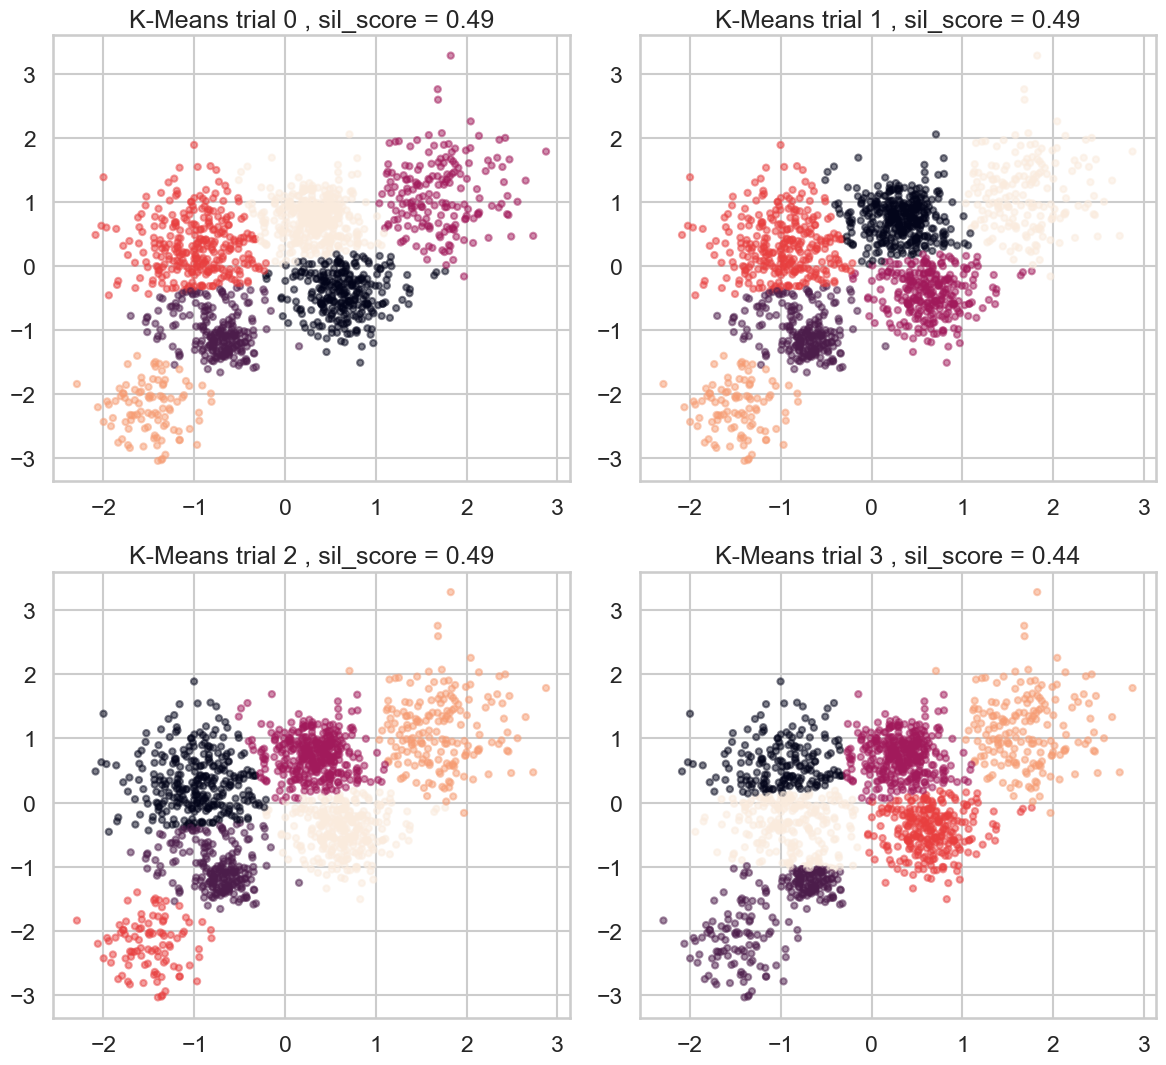

In [154]:
fig, axes = plt.subplots(2, 2, figsize=(12, 11))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten to iterate easily

for i in range(0, 4):
    model = KMeans(n_clusters=6)
    cluster_labels = model.fit_predict(Multi_blob_Data_Scaled)
    axes[i].scatter(Multi_blob_Data_Scaled[:, 0],  
                    Multi_blob_Data_Scaled[:, 1],    
                    c=cluster_labels, alpha=0.5, s=20)
    axes[i].set_title(f'K-Means trial {i} , sil_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels):.2f}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [156]:
sil_score=[]
for i in range(0, 20):
    model = KMeans(n_clusters=6)
    cluster_labels = model.fit_predict(Multi_blob_Data_Scaled)
    sil_score.append(round(silhouette_score(Multi_blob_Data_Scaled,cluster_labels),2))

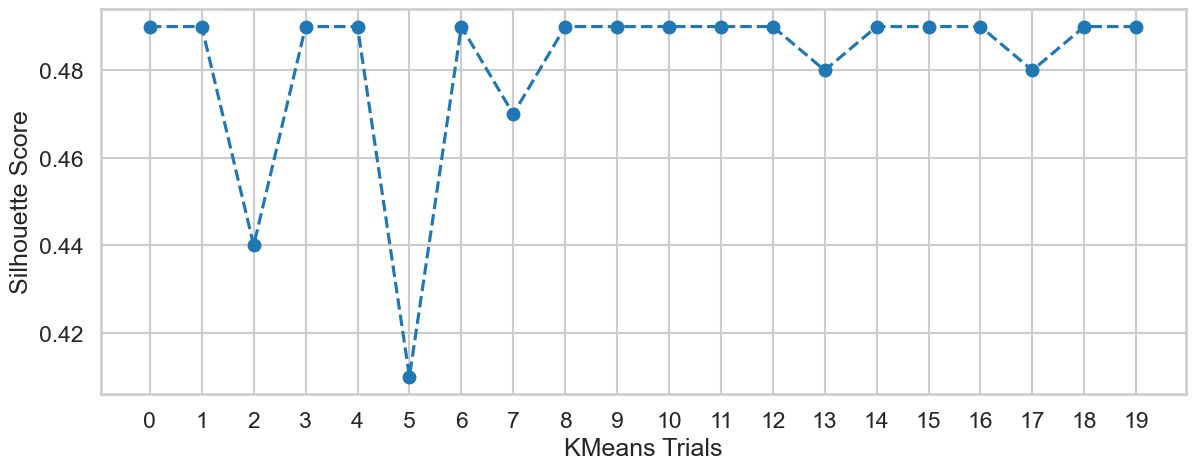

In [157]:
plt.figure(figsize=(14, 5))
plt.plot(range(0, 20, 1), sil_score, 'o--')

plt.xlabel("KMeans Trials")
plt.ylabel("Silhouette Score")

plt.xticks(range(0, 20, 1))  # Force x-axis to show only integers
plt.show()

As we can see the centroid initailization affect the cluster assignment and in turns the performance of the model

- This can be solved using another variation of Kmeans which is Kmeans_plusplus

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

## Customer dataset
Repeat all the above on the customer data set 